### **What Is Classification?**

* An application of machine learning where an algorithm aims to correctly predict a class or label after being provided some input data features (known as predictor variables) (*Keita*, 2022).

###**Step Zero: Setup**

* Includes the importing the relevant libraries and creating some visualization functions.

####**Dependencies**

* The following libraries will be used in the development of the classification model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

####**Pre-defined Evaluation Functions**

**Confusion Matrix plots**

* This user-defined function will be called later on in the notebook to quickly plot the confusion matrices for the two models.

In [2]:
def two_cf_function(title, y_true, y_preds_1, y_preds_2):
  fig, ax = plt.subplots(1, 2, figsize = (7, 4))
  fig.suptitle(str(title))
  ax[0].set_title("K-Nearest Neighbor")
  ax[1].set_title("Naïve Bayes")
  plt.tight_layout()

  ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true, y_preds_1), display_labels = [0, 1]).plot(ax = ax[0], cmap = 'Blues', colorbar = False)
  ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true, y_preds_2), display_labels = [0, 1]).plot(ax = ax[1], cmap = 'Blues', colorbar = False)

**Accuracy Barplot**

* This user-defined function will be called later on in the notebook to quickly plot a bar graph visualizing the accuracy scores for the two models.

In [3]:
def two_acc_function(title, y_true, KNN_preds, NB_preds):

  def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])

  data    = {'KNN': accuracy_score(y_true, KNN_preds) * 100, 'NB': accuracy_score(y_true, NB_preds) * 100}
  courses = list(data.keys())
  values  = list(data.values())

  fig = plt.figure(figsize = (5, 4))
  plt.bar(courses, values, width = 0.4, color = ['b', 'g'])
  addlabels(data, values)
  plt.xlabel('Model')
  plt.ylabel('Accuracy (%)')
  plt.title(str(title))
  plt.show()

###**Step One: The Dataset**

* Dataset source: https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification?select=ParisHousingClass99.88.csv
* All feature variables will be used for training the model.
* `category` is the target variable in which the goal of our classification models are to predict whether a property listing falls into the `Basic` or `Luxury` class.  
* Since the target values are represented as binary classes (either `0` or `1`), following a classification method towards predicting our `category` value would be the more suitable approach compared to using a regression algorithm, which is more preferable when predicting continuous values


In [4]:
MY_DF = pd.read_csv(r'https://raw.githubusercontent.com/ST10437317/kpillay-firstrepo-vc/main/ST10437317_PARIS_DATA.csv')
MY_DF.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2,Basic
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5,Luxury
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3,Luxury
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1,Basic


**Dataset Information**

* Checking for null values and non-numerical data fields.

**Note(s)**
* There are exactly `10000` observations present.
* All feature variable datatypes are initially numerical.
* There are no `null` values present.

In [5]:
MY_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

`null` **Count**

* Properly ensure that no `null` values are present.

In [6]:
MY_DF.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

####**Numerical Encoding**

* The `category` variable labels need to be numerically converted.

In [7]:
L_ENCODE = LabelEncoder()
MY_DF.replace(MY_DF['category'].values, L_ENCODE.fit_transform(MY_DF['category']), inplace = True)
MY_DF.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,1
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2,0
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5,1
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3,1
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2,0
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1,0


####**Descriptive Statistics**

* Here we are looking at a statistical breakdown of the dataset which helps us to achieve a general overview of how our data is distributed or determine if there are possible outliers present.

In [8]:
MY_DF.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


**Checking class representation**

* The pie chart below visualizes the proportion of `Basic` (represented as `0`) and `Luxury` (represented as `1`) samples.
* There is a class imbalance present which may affect the performance of the model.

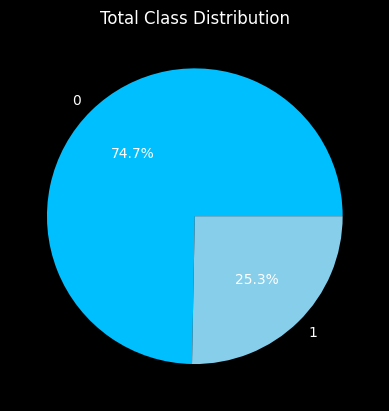

In [9]:
plt.style.use('dark_background')
round(MY_DF['category'].value_counts() / MY_DF.shape[0] * 100, 2).plot.pie(autopct = '%1.1f%%', colors = ['deepskyblue', 'skyblue'])
plt.title('Total Class Distribution')
plt.ylabel('');

**Checking for Outliers**

* Box-and-whisker diagrams are used here to visually depict the spread of the data values.

**Notes**:
* Apart from the binary features, there do not seem to be any major outliers present in the dataset.
* The target `category` however is skewed since, the `Basic` class accounts for approximately three-quarters of the y-values in the dataset.

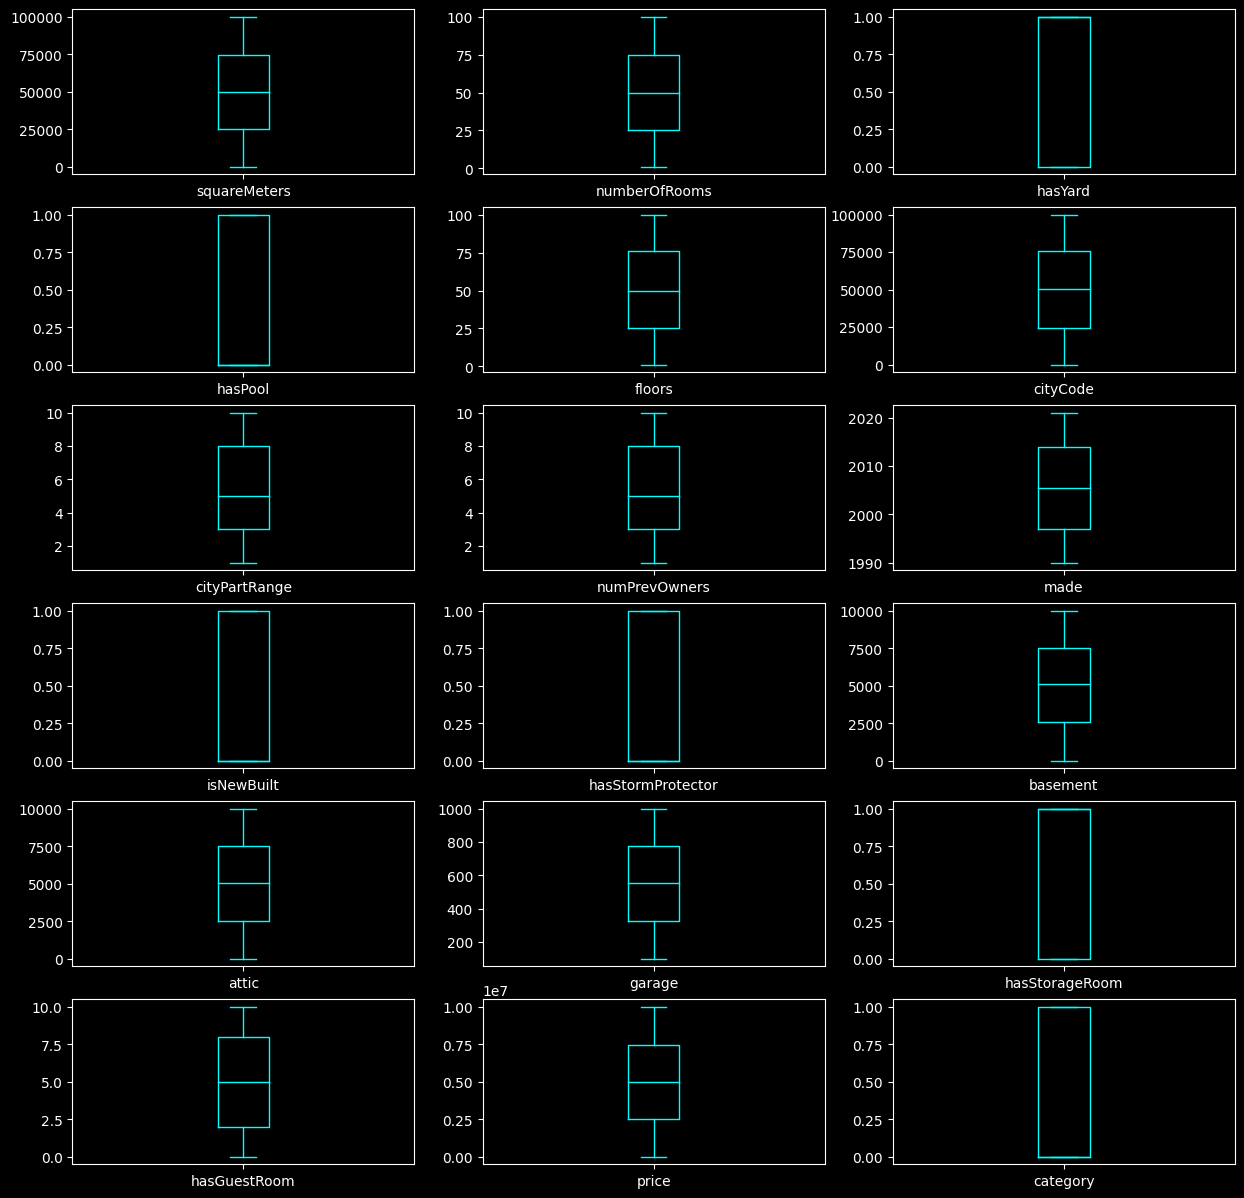

In [10]:
MY_DF.plot(kind = "box", subplots = True, figsize = (15, 15), layout = (6, 3), color = 'aqua')
plt.show();

**Correlation Heatmap**

* Used to determine the strength of the relationships between our variables using the R-value statistic.

**Notes**
* `price` and `squareMeters` have a very high degree of linear correlation.
* The `hasYard` and `isNewBuilt` predictors have a significantly stronger relationship to the `category` target compared to the other features.

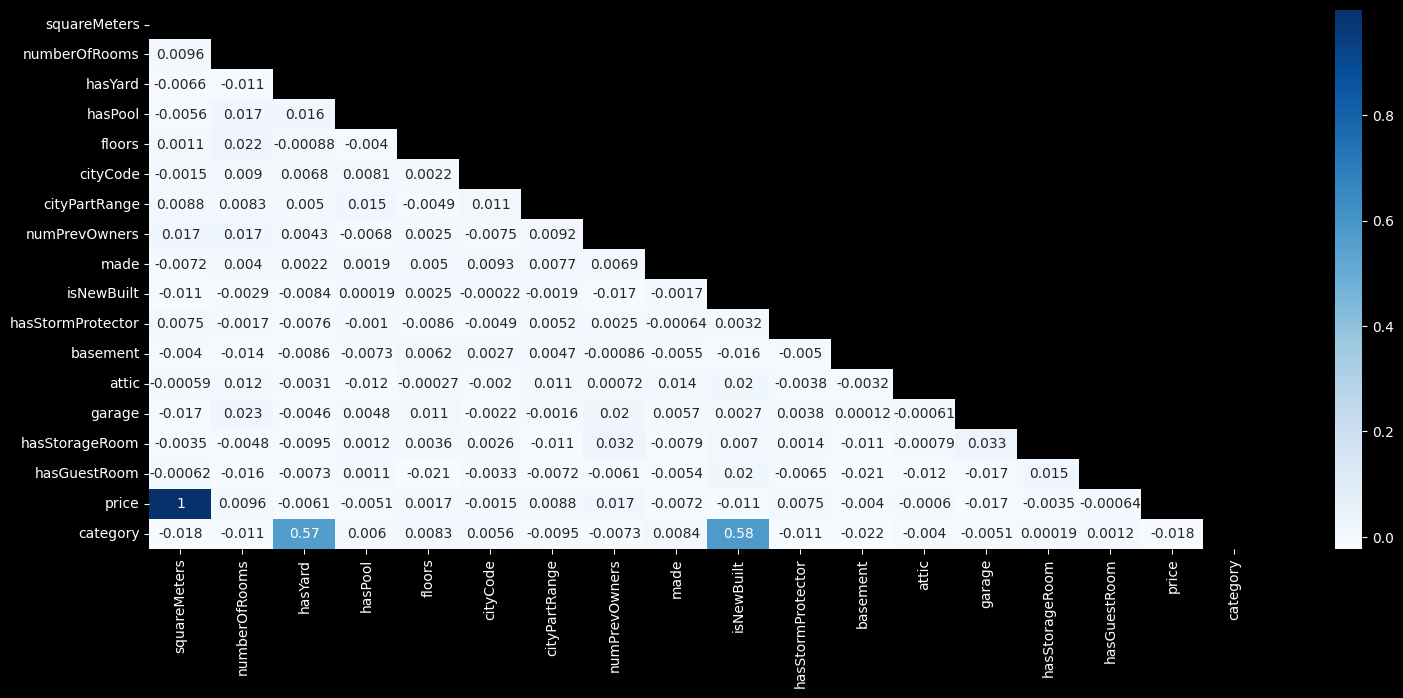

In [11]:
plt.figure(figsize = (18, 7))
sns.heatmap(MY_DF.corr(), cmap = "Blues", annot = True, mask = np.triu(MY_DF.corr()))
plt.tight_layout
plt.show()

###**Step Two: Train, Validation and Test Splits**

* The holdout method will be used where the dataset is divided into training, testing and validation splits unlike the classic split where the data is only split into training and test subsets.
* The Holdout validation method shall aim to help us determine how well our models generalize on unseen data by using a different data split ratio (`70`:`15`:`15`) instead of `80`:`20`.

In [12]:
X = MY_DF.drop(columns = ['category'])
y = MY_DF['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
X_valid = X_test.tail(1500)
y_valid = y_test.tail(1500)
X_test  = X_test.head(1500)
y_test  = y_test.head(1500)
len(X_train), len(y_train), len(X_valid), len(y_valid), len(X_test), len(y_test)

(7000, 7000, 1500, 1500, 1500, 1500)

####**Additional Processing**

**Scalar Encoding**

* The `StandardScaler` class is used to normalize our data by standardizing the variance using a specific calculation in order to ensure that there are no irregularities in the distribution of the data variables which may affect how our model interprets our dataset.

In [13]:
SCALER  = StandardScaler()
X_train = SCALER.fit_transform(X_train)
X_test  = SCALER.transform(X_test)
X_valid = SCALER.transform(X_valid)

**Encoded Samples**

In [14]:
pd.DataFrame(X_train).head(14)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.551743,0.465074,0.992315,1.006306,0.436705,0.190239,-0.182397,0.512381,0.472711,-0.996577,-0.997432,-1.372265,0.465196,1.670082,-1.002575,1.586112,-1.550972
1,-1.249734,-1.443325,-1.007744,-0.993734,-1.082458,-0.681740,-0.878949,-0.534618,-1.564178,-0.996577,-0.997432,0.498434,1.128322,-1.648165,-1.002575,1.586112,-1.251788
2,-1.549924,-1.651514,-1.007744,1.006306,0.540285,-0.004402,1.558982,-0.185618,0.151097,-0.996577,-0.997432,-0.611250,-0.402978,-1.251501,-1.002575,-0.304421,-1.548043
3,0.810611,1.054943,-1.007744,-0.993734,-0.391929,1.683188,0.514155,-1.232617,1.330349,-0.996577,1.002575,-1.613062,1.088970,-1.556627,-1.002575,0.325757,0.809679
4,0.481656,1.471321,-1.007744,1.006306,-0.495509,0.748933,1.558982,0.163382,0.258302,-0.996577,1.002575,-1.298147,-1.558703,0.419065,-1.002575,0.640846,0.482241
5,0.212857,1.263132,0.992315,-0.993734,0.954602,-0.139151,1.210706,1.210381,1.115940,-0.996577,-0.997432,-1.727545,-1.704376,-1.323969,-1.002575,-0.934598,0.214141
6,0.353783,-1.547419,0.992315,-0.993734,-0.426456,-1.365921,-0.530673,-0.185618,-1.242564,-0.996577,1.002575,0.452850,-0.852081,0.735633,0.997432,-0.619510,0.353620
7,-1.123087,-1.061645,0.992315,-0.993734,0.540285,1.085545,-0.182397,0.861381,0.043893,1.003434,1.002575,-0.953306,0.138293,0.544929,-1.002575,-0.934598,-1.121782
8,-0.414328,-0.055398,-1.007744,1.006306,-0.771720,-0.416943,-0.182397,-0.185618,1.008735,-0.996577,1.002575,0.571161,0.771387,0.922523,-1.002575,0.640846,-0.414352
9,-0.641972,1.367227,-1.007744,-0.993734,0.540285,-1.405630,-0.878949,-0.185618,0.687121,-0.996577,-0.997432,-0.323128,1.358570,-0.324680,-1.002575,-1.564776,-0.642758


In [15]:
pd.DataFrame(X_test).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.055228,-1.512721,0.992315,-0.993734,0.367652,-0.529608,0.862430,-1.232617,-1.028154,1.003434,1.002575,-0.586196,0.895659,1.323001,0.997432,-1.249687,1.056172
1,-0.432280,0.985547,0.992315,1.006306,1.265340,0.255626,-0.878949,-0.883617,1.437554,1.003434,-0.997432,0.209269,1.107265,-1.484160,-1.002575,0.010668,-0.431430
2,1.262505,-0.506474,0.992315,-0.993734,-0.219297,1.140564,1.210706,0.512381,-1.456973,-0.996577,1.002575,0.571161,0.357149,0.544929,0.997432,0.640846,1.262174


In [16]:
pd.DataFrame(X_valid).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.063140,-1.304532,-1.007744,-0.993734,0.643864,1.491035,-0.530673,-1.581617,-0.170517,-0.996577,1.002575,-0.577496,-1.300839,-1.404064,-1.002575,0.955934,-1.064193
1,0.566310,-0.402380,-1.007744,1.006306,1.645131,-1.664552,0.514155,-1.232617,-0.277721,1.003434,-0.997432,-1.045867,0.292942,0.243617,0.997432,1.586112,0.566089
2,-1.139989,-0.853456,-1.007744,-0.993734,1.161761,-0.441549,-1.575500,-0.883617,-1.671382,1.003434,1.002575,1.227089,-0.361209,-0.259841,-1.002575,1.586112,-1.140341


###**Step Three: Modelling**

* Two classification models will be trained and compared from this point on.

**What is the most optimal** `n_neighbors` **value for the KNN Model?**

* Using a manual cross validation for-loop to find out which `n_neighbors` value achieves the highest accuracy score.

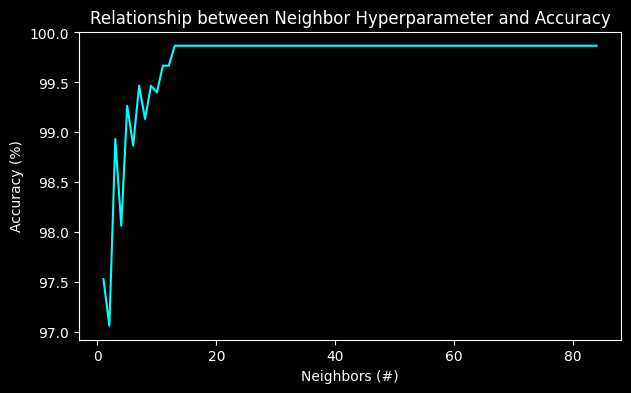

In [17]:
NUM_N = []
ACC   = []

for n in range(1, 85):
  TEST_KNN_MODEL = KNeighborsClassifier(n_neighbors = n)
  TEST_KNN_MODEL.fit(X_train, y_train)
  NUM_N.append(n)
  y_preds = TEST_KNN_MODEL.predict(X_test)
  ACC.append(accuracy_score(y_test, y_preds) * 100)

plt.figure(figsize = (7, 4))
plt.plot(np.array(NUM_N), np.array(ACC),  color = 'aqua')
plt.title('Relationship between Neighbor Hyperparameter and Accuracy')
plt.xlabel('Neighbors (#)')
plt.ylabel('Accuracy (%)')
plt.show()

**K-Nearest Neighbor instance**

* The K-Nearest algorithm functions by examining each data point and their proximity to the neighbouring data points.
* The data is then provided a label based on their distance to the nearest data values with their own respective class or category.
* Instantiating `KNeighborsClassifier` with the most optimal `n_neighbors`.

In [18]:
KNN_MODEL = KNeighborsClassifier(n_neighbors = (np.argmax(ACC) + 1))
KNN_MODEL.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

**Gaussian Naïve Bayes instance**

* Makes use of the Bayes' Theorem where it is assumed that all the feature variables are independent of each other instead of considering multicollinearity between variables (*Gamal*, 2020).
* So after assuming feature-independency, it calculates the probability of each feature and their impact on the output class value.
* There are many types of Naïve Bayes variants offered by `sklearn` such as:

  *   Multinomial
  *   Bernoulli
  *   Gaussian
* `GaussianNB` will be chosen for this classification problem as Gaussian distribution assumes that the continuous independent variables are normally or symmetrically distributed.



In [19]:
NB_MODEL = GaussianNB()
NB_MODEL.get_params()

{'priors': None, 'var_smoothing': 1e-09}

**Data Fitting**

In [20]:
KNN_MODEL.fit(X_train, y_train);
NB_MODEL.fit(X_train, y_train);

###**Step Four: Model Assessment**

* The performance of the `KNeighborsClassifier` and `GaussianNB` models on the test and validation splits will be mainly critiqued using accuracy.

####**Using the Testing split**

**Testing Predictions**

In [21]:
KNN_test_preds = KNN_MODEL.predict(X_test)
NB_test_preds  = NB_MODEL.predict(X_test)
pd.DataFrame({'True Labels' : y_test, 'Predicted KNN Labels' : KNN_test_preds, 'Predicted NB Labels' : NB_test_preds}).head(15)

,True Labels,Predicted KNN Labels,Predicted NB Labels
6252,1,1,1
4684,1,1,1
1731,0,0,0
4742,1,1,1
4521,0,0,0
6340,0,0,0
576,1,1,1
5202,1,1,1
6363,0,0,0
439,1,1,1


**Confusion Matrices**

* The matrices below show the counts for the models' predicted `category` values to the actual `category` values on the test split.

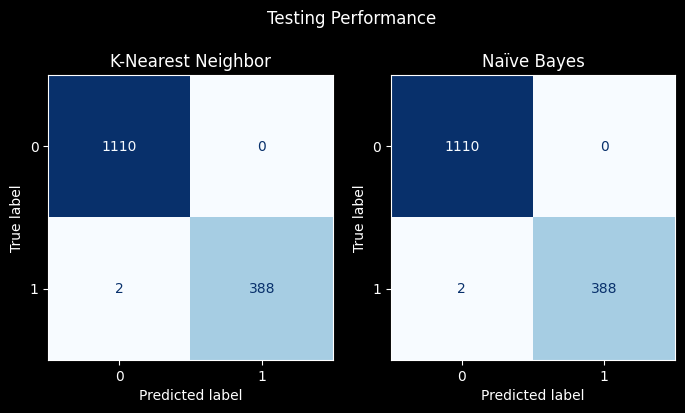

In [22]:
two_cf_function('Testing Performance', y_test, KNN_test_preds, NB_test_preds);

**Accuracy**

* Bar graph displaying the accuracy scores for the two models' performance on the test split.

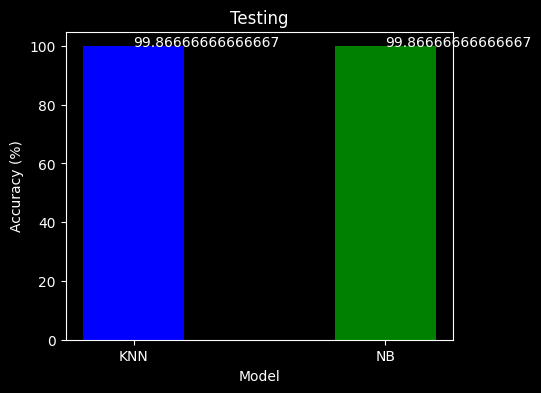

In [23]:
two_acc_function("Testing", y_test, KNN_test_preds, NB_test_preds)

####**Using the Validation split**


**Validation Predictions**

In [24]:
KNN_valid_preds = KNN_MODEL.predict(X_valid)
NB_valid_preds  = NB_MODEL.predict(X_valid)
pd.DataFrame({'True Labels' : y_valid, 'Predicted KNN Labels' : KNN_valid_preds, 'Predicted NB Labels' : NB_valid_preds}).head(15)

,True Labels,Predicted KNN Labels,Predicted NB Labels
8701,0,0,0
3429,0,0,0
8870,0,0,0
6962,1,1,1
2088,0,0,0
8499,1,1,1
6162,1,1,1
3210,0,0,0
9200,1,1,1
6605,0,0,0


**Confusion Matrices**

* The matrices below show the counts for the models' predicted `category` values to the actual `category` values on the validation split.

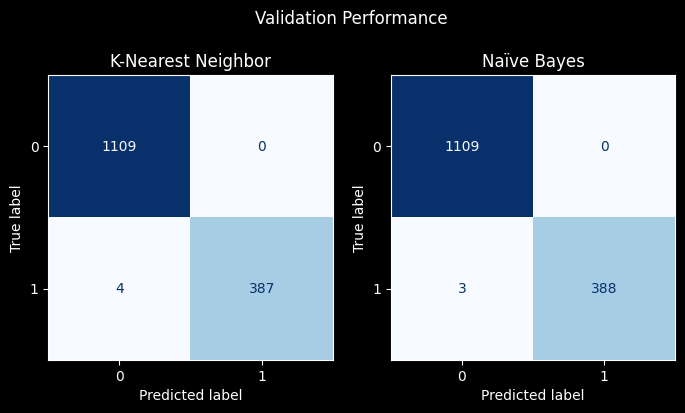

In [25]:
two_cf_function('Validation Performance', y_valid, KNN_valid_preds, NB_valid_preds);

**Accuracy**

* Bar graph displaying the accuracy scores for the two models' performance on the validation split.

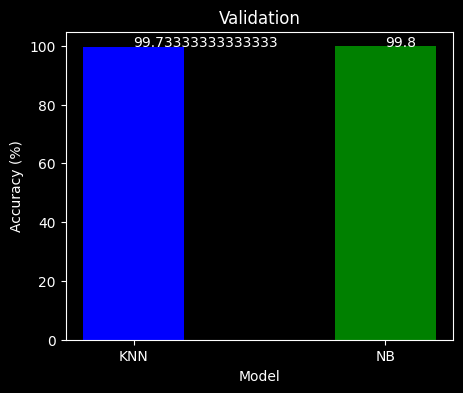

In [26]:
two_acc_function("Validation", y_valid, KNN_valid_preds, NB_valid_preds)

###**Outcomes:**



*   `KNeighborsClassifier` and `GaussianNB` both perform extremely well on this dataset despite the `category` label imbalance.



###**References**

Gamal, B., 2020. Naïve Bayes Algorithm. [Online]
Available at: https://medium.com/analytics-vidhya/na%C3%AFve-bayes-algorithm-5bf31e9032a2
[Accessed 25 May 2024].

Keita, Z., 2022. Classification in Machine Learning: An Introduction. [Online]
Available at: https://www.datacamp.com/blog/classification-machine-learning
[Accessed 25 May 2024].

